In [6]:
import pandas as pd
a=pd.read_csv('/content/delhi_aqi.csv')
print(a)

                      date       co     no     no2     o3     so2   pm2_5  \
0      2020-11-25 01:00:00  2616.88   2.18   70.60  13.59   38.62  364.61   
1      2020-11-25 02:00:00  3631.59  23.25   89.11   0.33   54.36  420.96   
2      2020-11-25 03:00:00  4539.49  52.75  100.08   1.11   68.67  463.68   
3      2020-11-25 04:00:00  4539.49  50.96  111.04   6.44   78.20  454.81   
4      2020-11-25 05:00:00  4379.27  42.92  117.90  17.17   87.74  448.14   
...                    ...      ...    ...     ...    ...     ...     ...   
18771  2023-01-24 04:00:00  1762.39   4.64   37.01  33.26   30.52  231.15   
18772  2023-01-24 05:00:00  1735.69   6.82   34.96  46.49   34.33  225.08   
18773  2023-01-24 06:00:00  1922.61   8.16   40.10  56.51   43.39  242.49   
18774  2023-01-24 07:00:00  1361.85   9.05   52.78  71.53  100.14  165.67   
18775  2023-01-24 08:00:00  1134.87   8.61   56.89  80.11  110.63  123.76   

         pm10    nh3  
0      411.73  28.63  
1      486.21  41.04  
2     

In [7]:
print(a.isnull())

        date     co     no    no2     o3    so2  pm2_5   pm10    nh3
0      False  False  False  False  False  False  False  False  False
1      False  False  False  False  False  False  False  False  False
2      False  False  False  False  False  False  False  False  False
3      False  False  False  False  False  False  False  False  False
4      False  False  False  False  False  False  False  False  False
...      ...    ...    ...    ...    ...    ...    ...    ...    ...
18771  False  False  False  False  False  False  False  False  False
18772  False  False  False  False  False  False  False  False  False
18773  False  False  False  False  False  False  False  False  False
18774  False  False  False  False  False  False  False  False  False
18775  False  False  False  False  False  False  False  False  False

[18776 rows x 9 columns]


In [8]:
#target variable
print(a['co'])

0        2616.88
1        3631.59
2        4539.49
3        4539.49
4        4379.27
          ...   
18771    1762.39
18772    1735.69
18773    1922.61
18774    1361.85
18775    1134.87
Name: co, Length: 18776, dtype: float64


In [9]:
a.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [10]:
a.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [11]:
#data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("/content/delhi_aqi.csv")
print(data.isnull().sum())

print(data.describe())

X = data.drop(['date', 'co'], axis=1)
y = data['co']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64
                 co            no           no2            o3           so2  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2929.228628     33.660702     66.221299     60.346239     66.693633   
std     2854.523506     62.127118     48.527492     80.464932     49.439191   
min      260.350000      0.000000      4.280000      0.000000      5.250000   
25%     1068.120000      0.680000     33.930000      0.340000     34.810000   
50%     1842.500000      5.250000     54.150000     27.180000     52.930000   
75%     3685.000000     35.760000     83.630000     92.980000     82.020000   
max    21148.680000    500.680000    460.620000    801.090000    579.830000   

              pm2_5          pm10           nh3  
count  18776.000000  18776.000000  18776.000000  
mean     238.130309    300.092966     25.109815  
std      226.533625    267

Linear Regression:
Mean Squared Error (MSE): 146726.25792939347
R-squared (R2): 0.9816374558803824


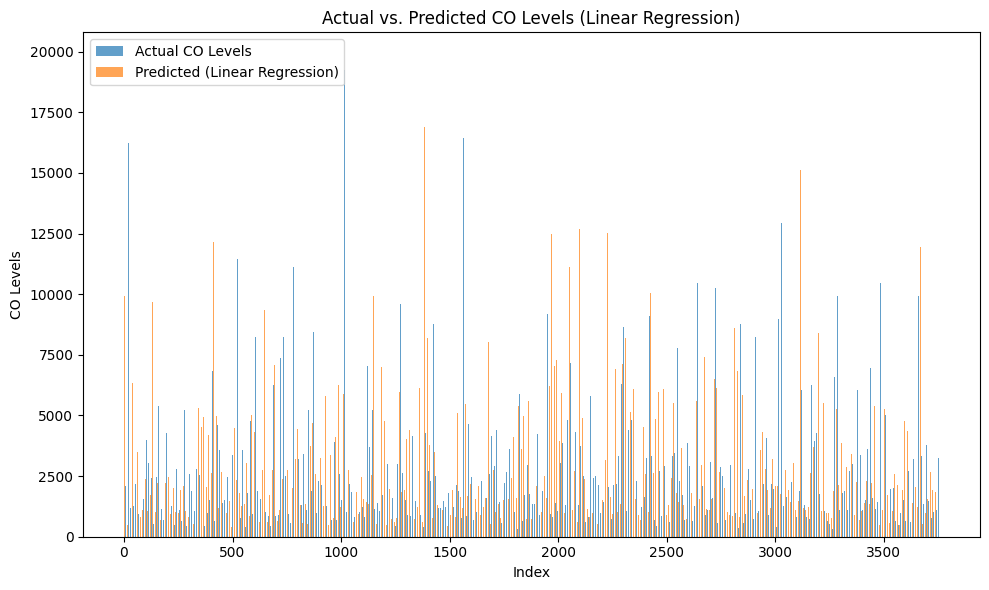

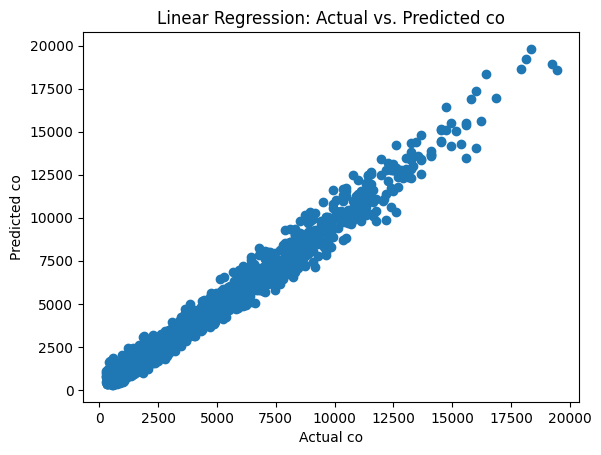

In [13]:
# Linear Regression
import matplotlib.pyplot as plt
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R-squared (R2): {r2_lr}")
#bar graph

index = np.arange(len(y_test))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(index, y_test, bar_width, label='Actual CO Levels', alpha=0.7)
plt.bar(index + bar_width, y_pred_lr, bar_width, label='Predicted (Linear Regression)', alpha=0.7)

plt.xlabel('Index')
plt.ylabel('CO Levels')
plt.title('Actual vs. Predicted CO Levels (Linear Regression)')
plt.legend()
plt.tight_layout()
plt.show()
# Plot predicted vs. actual values
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual co")
plt.ylabel("Predicted co")
plt.title("Linear Regression: Actual vs. Predicted co")
plt.show()


Support Vector Machine (SVM) Regression:
Mean Squared Error (MSE): 4111138.3248043903
R-squared (R2): 0.48549796105753407


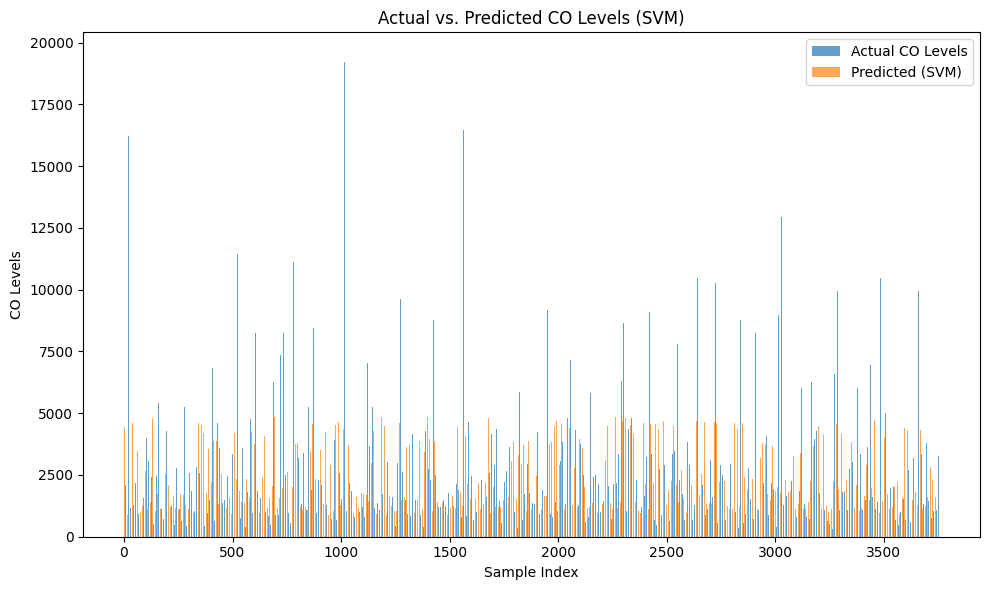

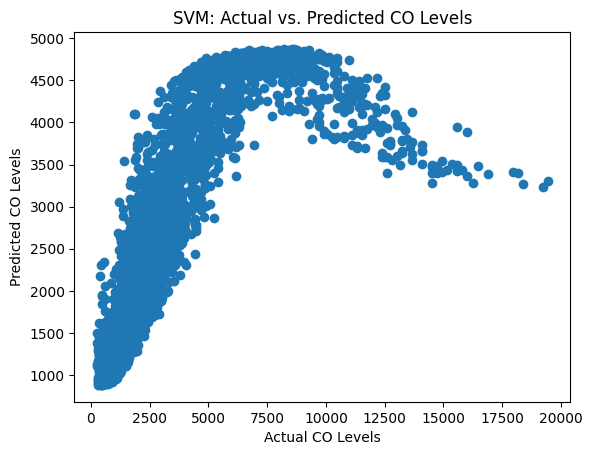

In [12]:
# Support Vector Machine (SVM) Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create an SVM regressor
svm = SVR()

# Fit the SVM model to the training data
svm.fit(X_train, y_train)

# Predict CO levels on the test set
y_pred_svm = svm.predict(X_test)

# Calculate MSE and R-squared for evaluation
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Print evaluation metrics
print("Support Vector Machine (SVM) Regression:")
print(f"Mean Squared Error (MSE): {mse_svm}")
print(f"R-squared (R2): {r2_svm}")

# Create a bar graph to visualize actual vs. predicted CO levels
plt.figure(figsize=(10, 6))
index = np.arange(len(y_test))  # Create an index array
bar_width = 0.35
plt.bar(index, y_test, bar_width, label='Actual CO Levels', alpha=0.7)
plt.bar(index + bar_width, y_pred_svm, bar_width, label='Predicted (SVM)', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('CO Levels')
plt.title('Actual vs. Predicted CO Levels (SVM)')
plt.legend()
plt.tight_layout()
plt.show()

# Create a scatter plot to visualize the relationship between actual and predicted CO levels
plt.scatter(y_test, y_pred_svm)
plt.xlabel("Actual CO Levels")
plt.ylabel("Predicted CO Levels")
plt.title("SVM: Actual vs. Predicted CO Levels")
plt.show()


Manually Computed Linear Regression Results:
Mean Squared Error (MSE): 1540800.00127
Mean Absolute Error (MAE): 786.67366
R-squared Score: 0.81936


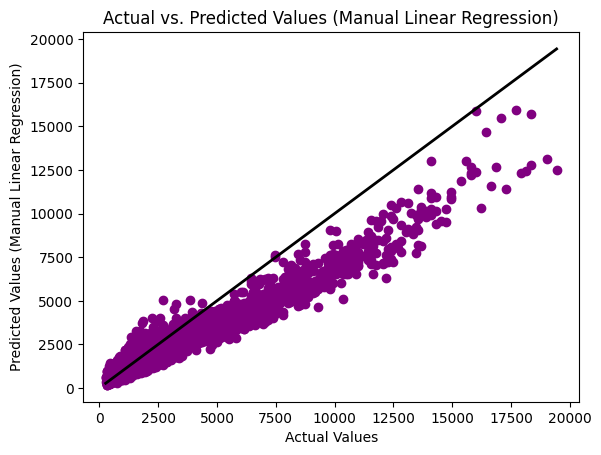

In [ ]:
#manual linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv('/content/delhi_aqi.csv')
df = df.drop(['date'], axis=1)
y = df["co"]
x = df.drop(["co", "co"], axis=1)

# Data preprocessing
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y, test_size=0.2)

# Manual Linear Regression
def manual(x, y, learning_rate, iterations):
    m, n = x.shape
    theta = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        y_pred = np.dot(x, theta)
        error = y_pred - y
        gradient = (1 / m) * np.dot(x.T, error)
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)
    return theta, cost_history

learning_rate = 0.01
iterations = 1000
theta, _ = manual(xTrain, yTrain, learning_rate, iterations)
y_pred_manual = np.dot(xTest, theta)
mse_manual = mean_squared_error(yTest, y_pred_manual)
mae_manual = mean_absolute_error(yTest, y_pred_manual)
r2_manual = r2_score(yTest, y_pred_manual)

# Printing results
print("Manually Computed Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_manual:.5f}")
print(f"Mean Absolute Error (MAE): {mae_manual:.5f}")
print(f"R-squared Score: {r2_manual:.5f}")

# Plot results
plt.scatter(yTest, y_pred_manual, c='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Manual Linear Regression)")
plt.title("Actual vs. Predicted Values (Manual Linear Regression)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.show()
